# Multivariate Regression (Energy Efficiency Prediction)

## Explanation

### Objective

Create a machine learning model that can predict energy efficiency, using Multivariate Regression algorithm.

### Column Descriptions

- ***X1*** = Relative Compactness
- ***X2*** = Surface Area
- ***X3*** = Wall Area
- ***X4*** = Roof Area
- ***X5*** = Overall Height
- ***X6*** = Orientation
- ***X7*** = Glazing Area
- ***X8*** = Glazing Area Distribution
- ***y1*** = Heating Load
- ***y2*** = Cooling Load

## A. Data Preparation

### A.1 Import Libraries

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [68]:
try:
    df = pd.read_csv('energy_efficiency.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [69]:
df.shape

(768, 10)

### A.4 Viewing Data Informations

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


### A.5 Viewing Data Statistics

In [71]:
df.describe().T.style.format("{:.4f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
X1,768.0000,0.7642,0.1058,0.6200,0.6825,0.7500,0.8300,0.9800
X2,768.0000,671.7083,88.0861,514.5000,606.3750,673.7500,741.1250,808.5000
X3,768.0000,318.5000,43.6265,245.0000,294.0000,318.5000,343.0000,416.5000
X4,768.0000,176.6042,45.1660,110.2500,140.8750,183.7500,220.5000,220.5000
X5,768.0000,5.2500,1.7511,3.5000,3.5000,5.2500,7.0000,7.0000
X6,768.0000,3.5000,1.1188,2.0000,2.7500,3.5000,4.2500,5.0000
X7,768.0000,0.2344,0.1332,0.0000,0.1000,0.2500,0.4000,0.4000
X8,768.0000,2.8125,1.5510,0.0000,1.7500,3.0000,4.0000,5.0000
Y1,768.0000,22.3072,10.0902,6.0100,12.9925,18.9500,31.6675,43.1000
Y2,768.0000,24.5878,9.5133,10.9000,15.6200,22.0800,33.1325,48.0300


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [72]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [73]:
df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


### A.7 Viewing Duplicated Data

In [74]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [75]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

### A.9 Viewing Outlier Data

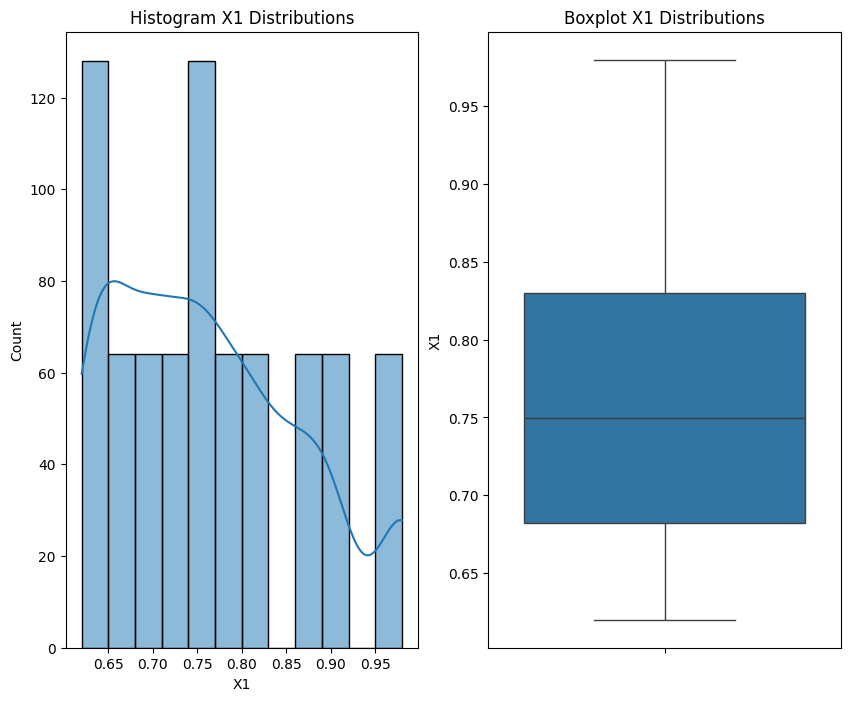

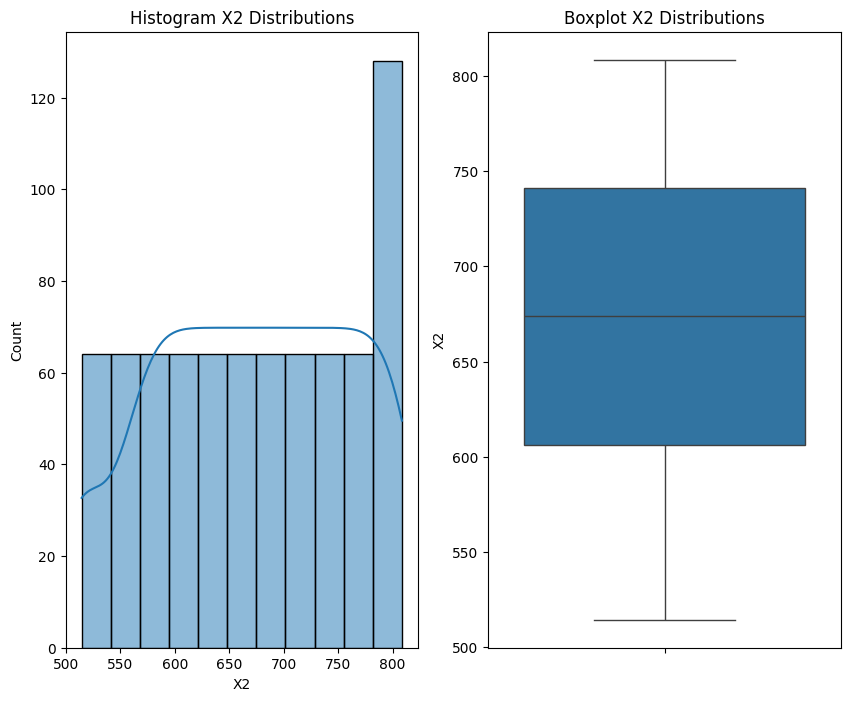

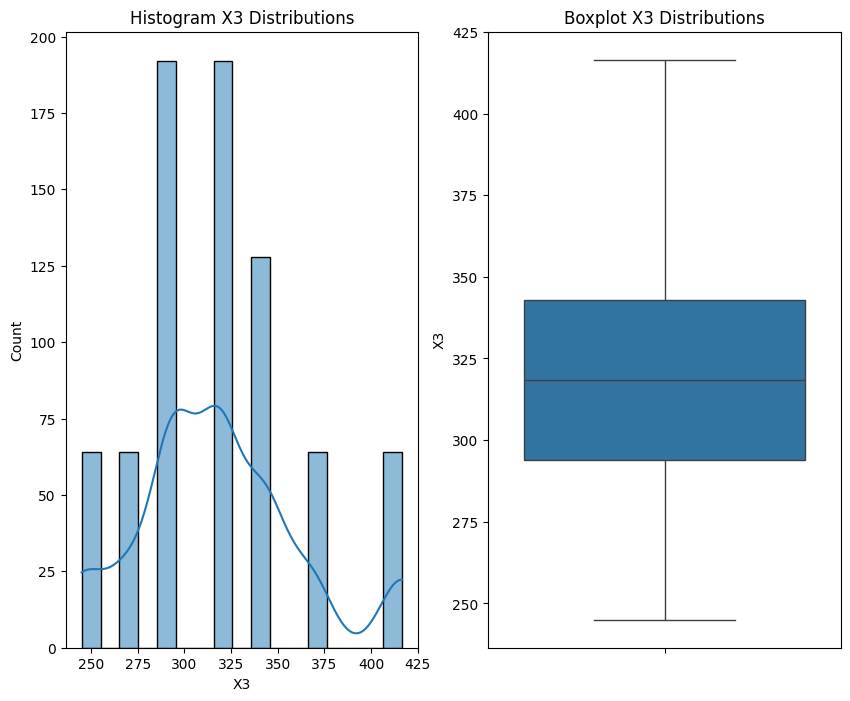

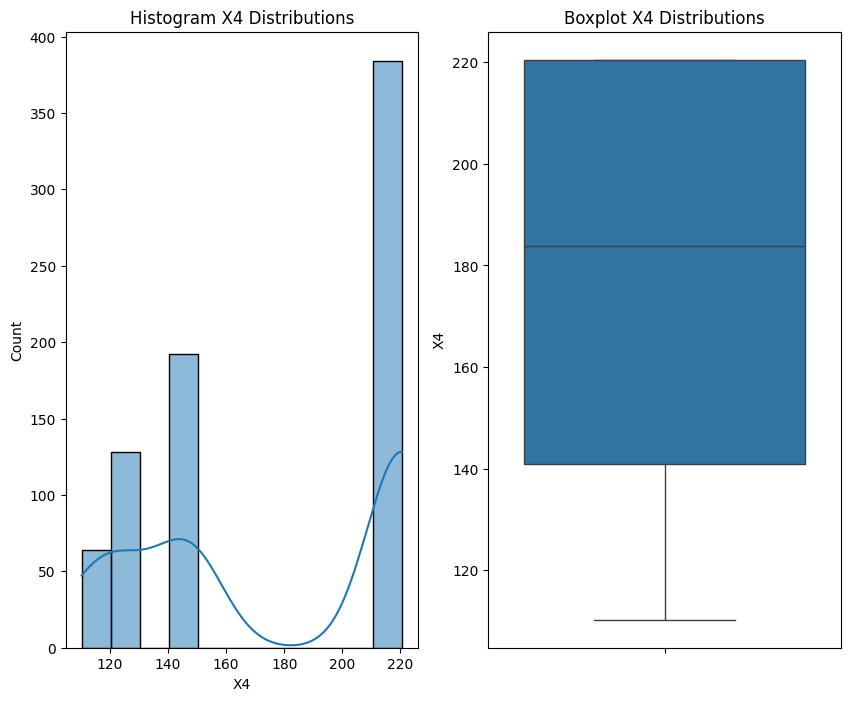

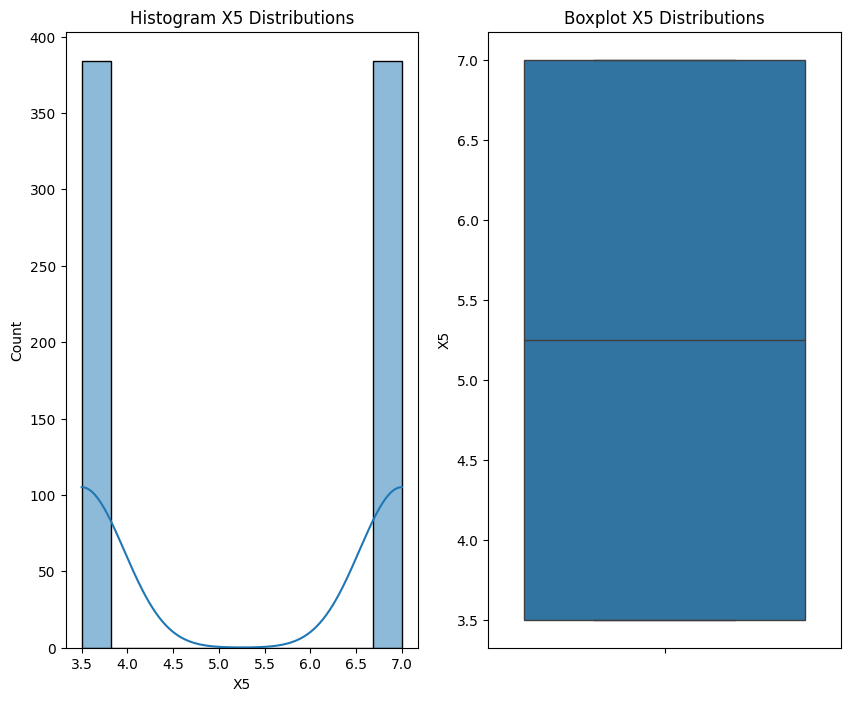

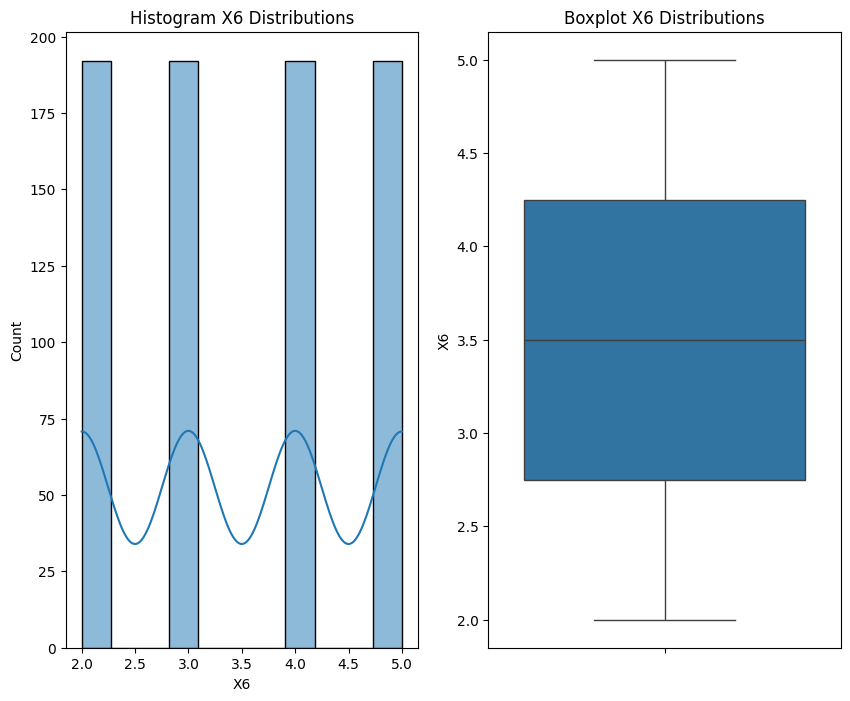

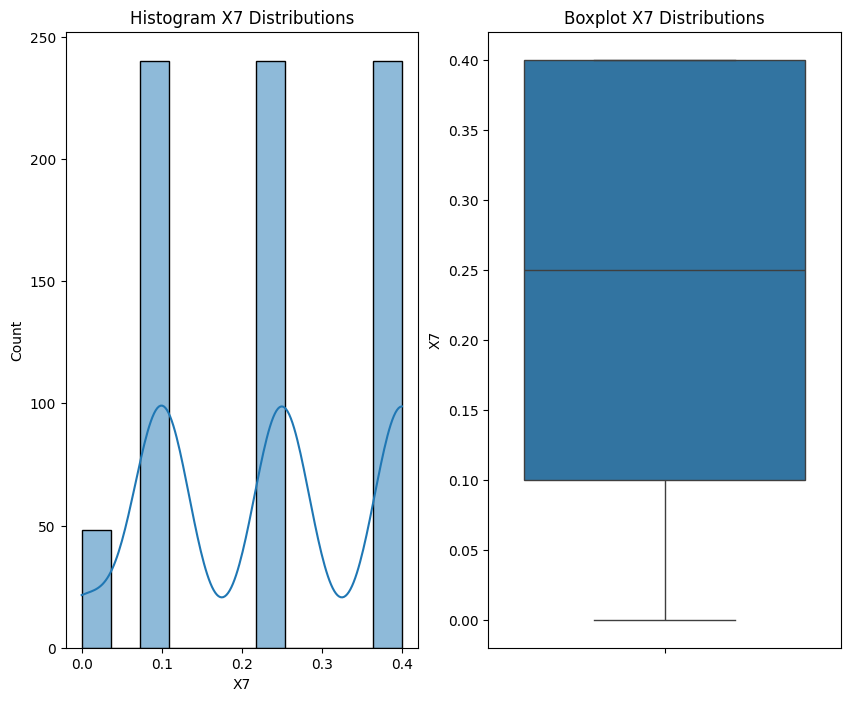

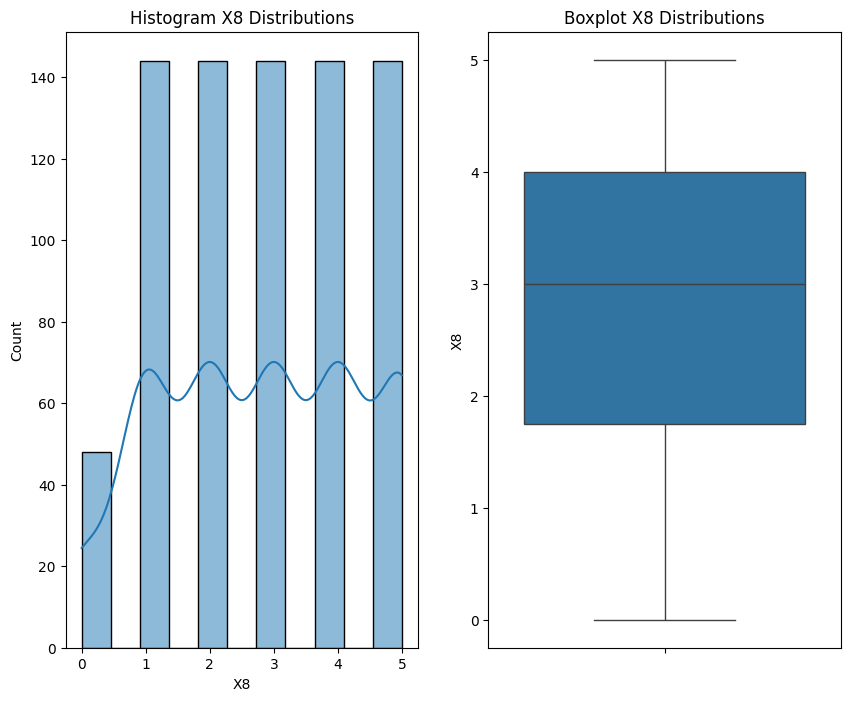

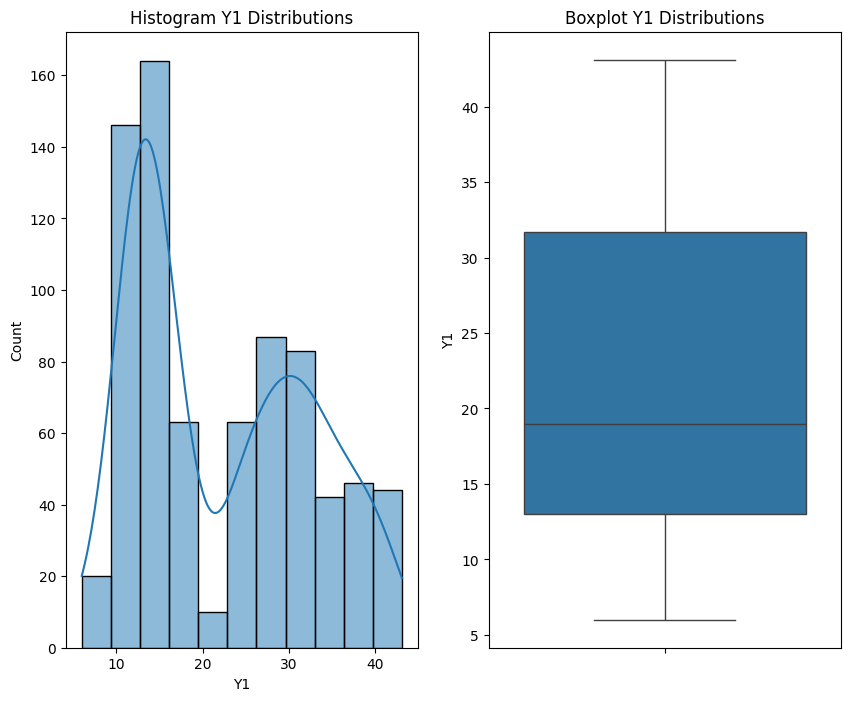

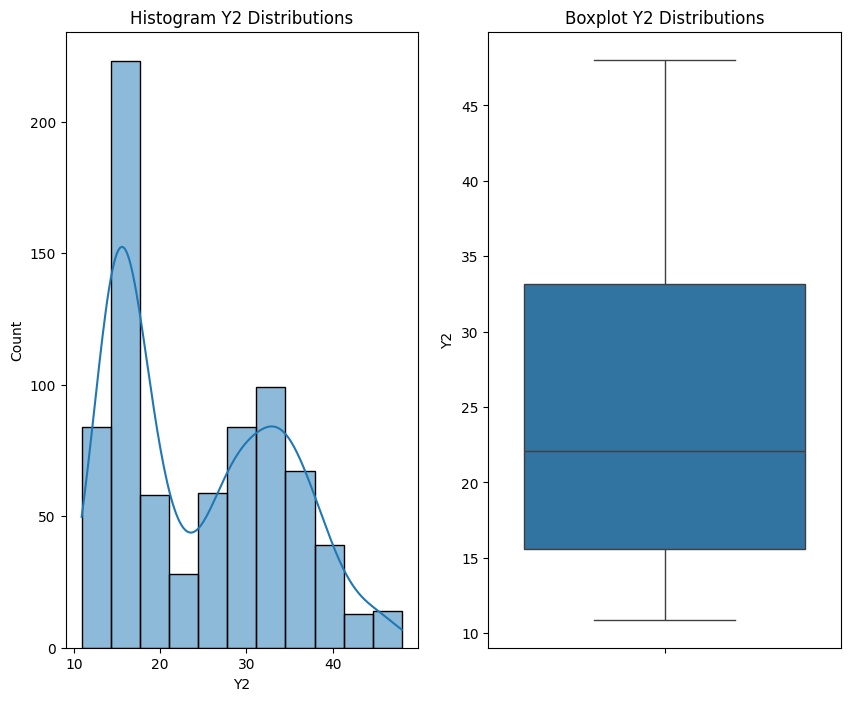

In [76]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram {col} Distributions")
    
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot {col} Distributions")

## B. Data Preprocessing

### B.1 Mapping Column Names

#### Feature & Label Columns

In [77]:
mapping_features = {'X1' : 'Relative Compactness', 'X2' : 'Surface Area', 'X3' : 'Wall Area',
                    'X4' : 'Roof Area', 'X5' : 'Overall Height', 'X6' : 'Orientation',
                    'X7' : 'Glazing Area', 'X8' : 'Glazing Area Distribution', 'Y1' : 'Heating Load',
                    'Y2' : 'Cooling Load'}

df_clean = df.rename(columns=mapping_features)

In [78]:
df_clean.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## C. Exploratory Data Analysis

### C.1 Univariate Analysis

#### Label 1 & 2 Distributions

Text(0.5, 1.0, 'Cooling Load Distributions')

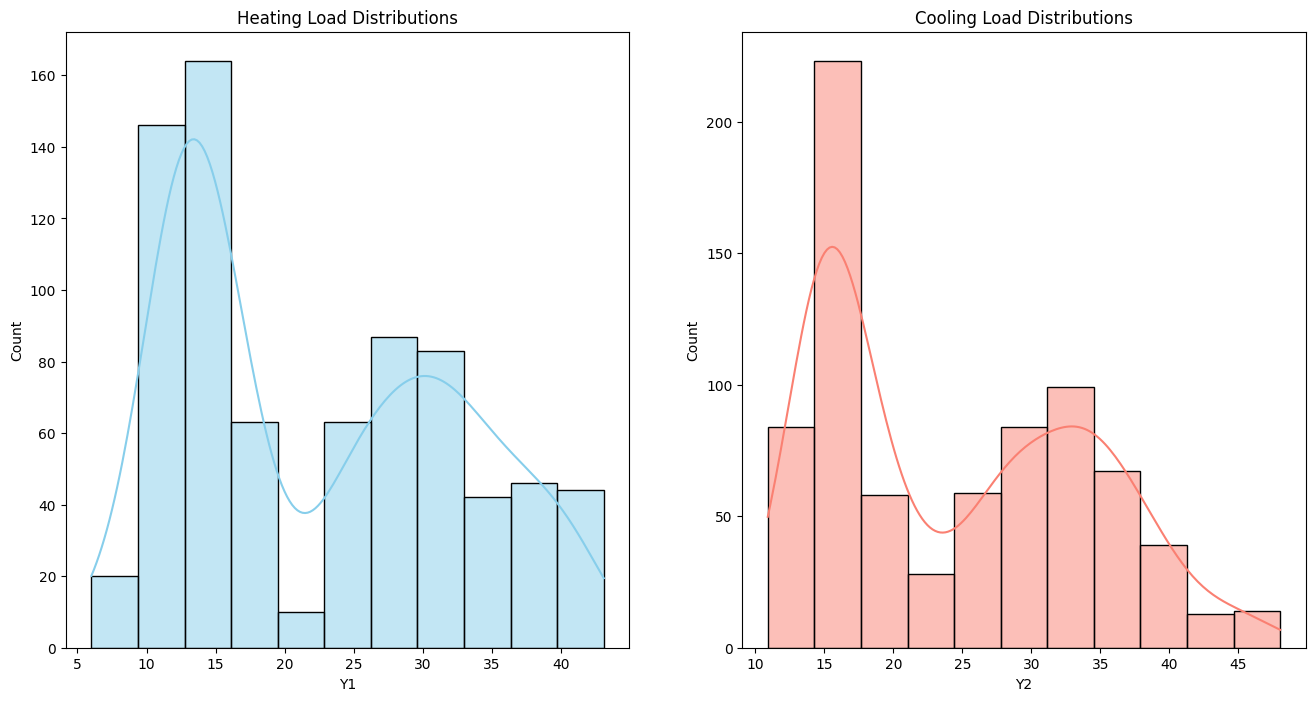

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(df['Y1'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Heating Load Distributions")

sns.histplot(df['Y2'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Cooling Load Distributions")

### C.2 Bivariate Analysis

#### Correlation Each Feature With Label

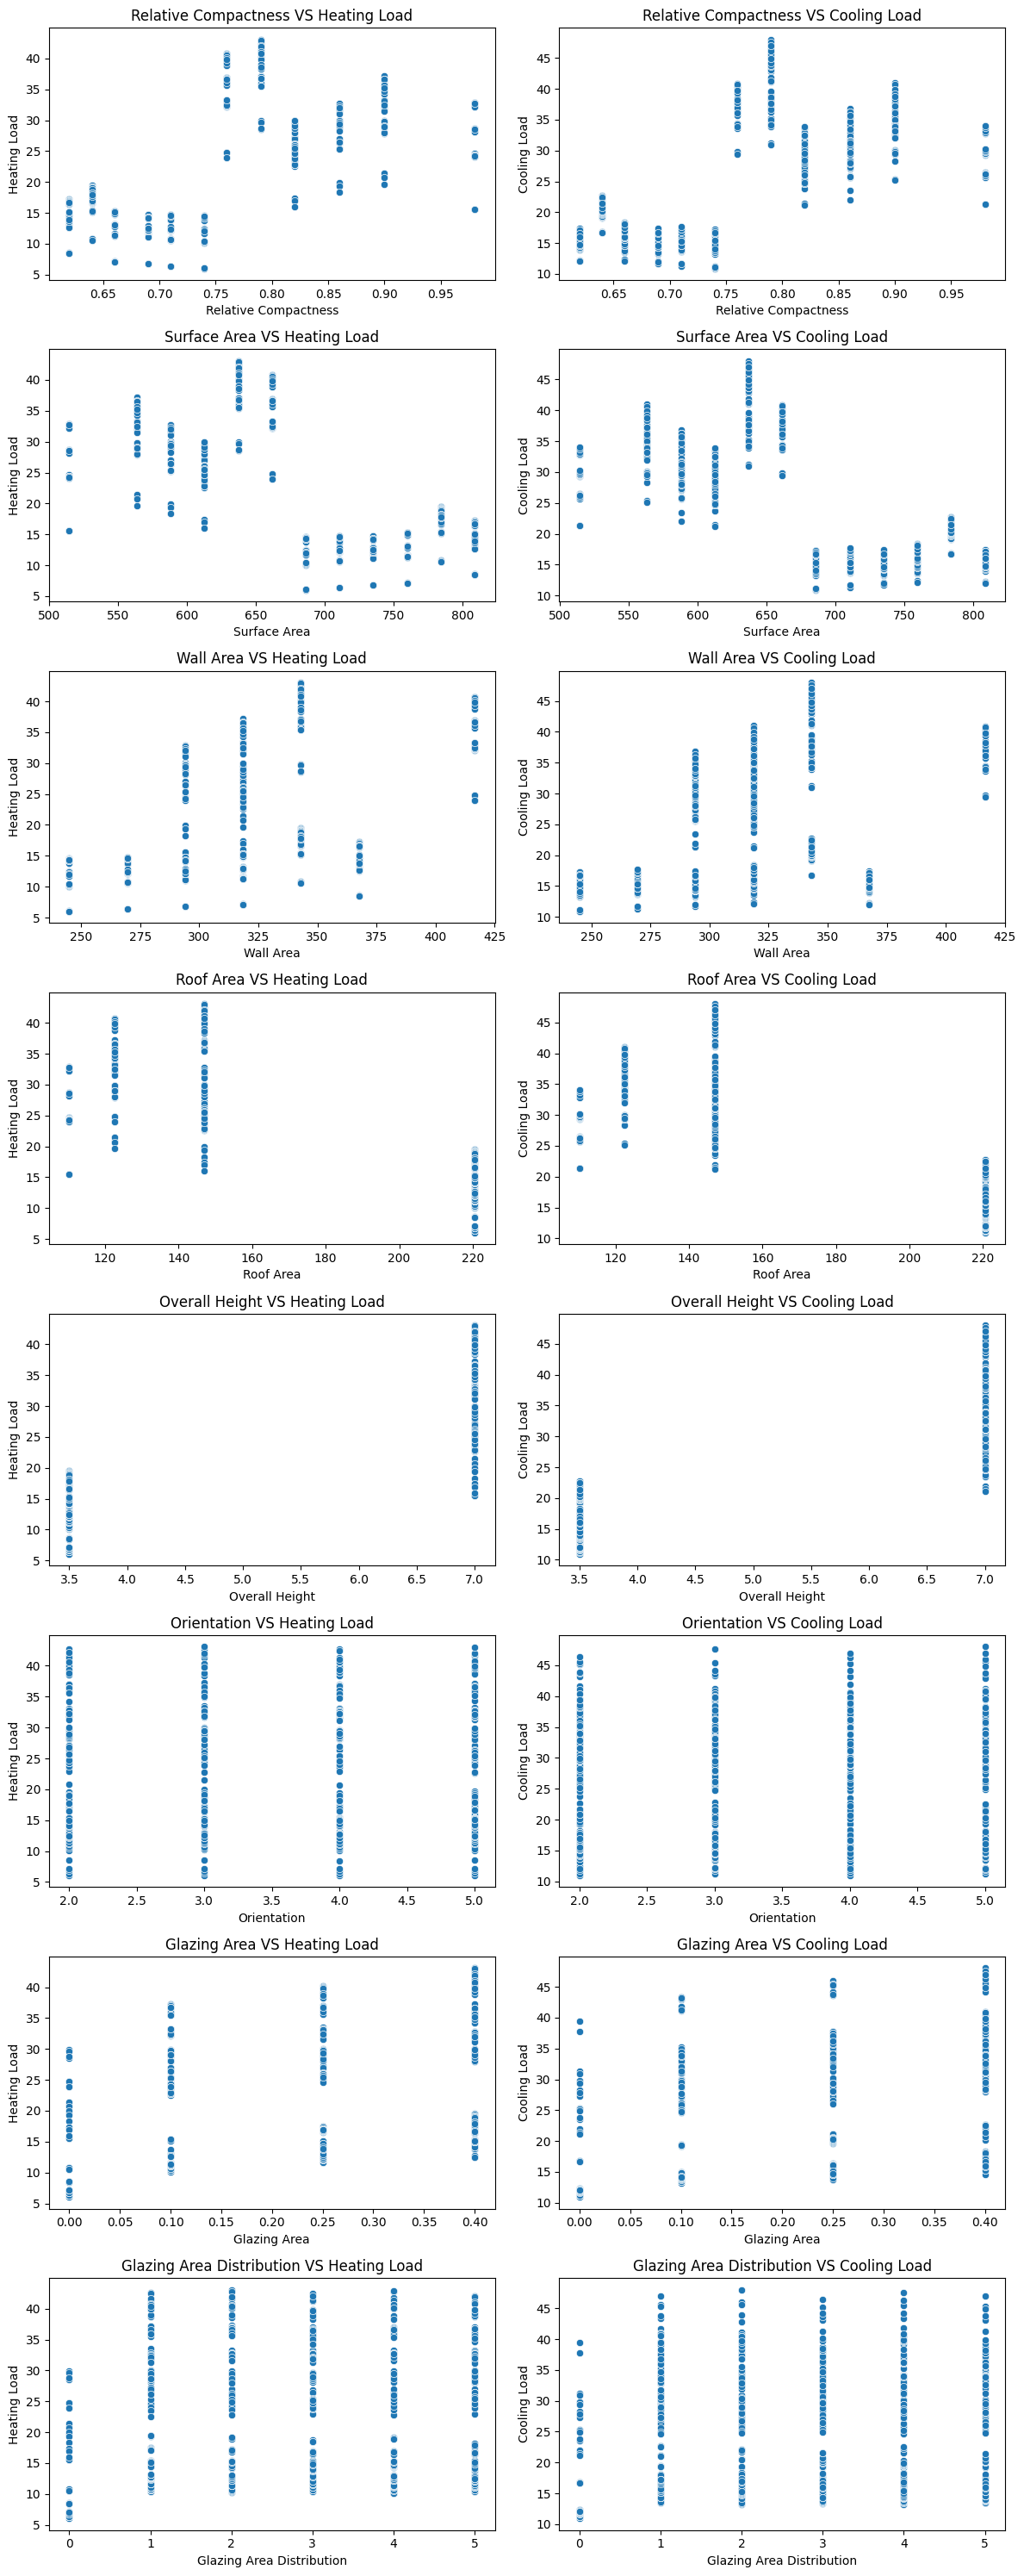

In [80]:
features = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height',
            'Orientation', 'Glazing Area','Glazing Area Distribution']

fig, axes = plt.subplots(8, 2, figsize=(12, 30))

for i, col in enumerate(features):
    sns.scatterplot(x=df_clean[col], y=df_clean['Heating Load'], ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} VS Heating Load')
    axes[i, 0].set_xlabel(f'{col}')
    axes[i, 0].set_ylabel('Heating Load')
    
    sns.scatterplot(x=df_clean[col], y=df_clean['Cooling Load'], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} VS Cooling Load')
    axes[i, 1].set_xlabel(f'{col}')
    axes[i, 1].set_ylabel('Cooling Load')
    
plt.tight_layout()
plt.show()

### C.3 Multivariate Analysis

<Figure size 800x600 with 0 Axes>

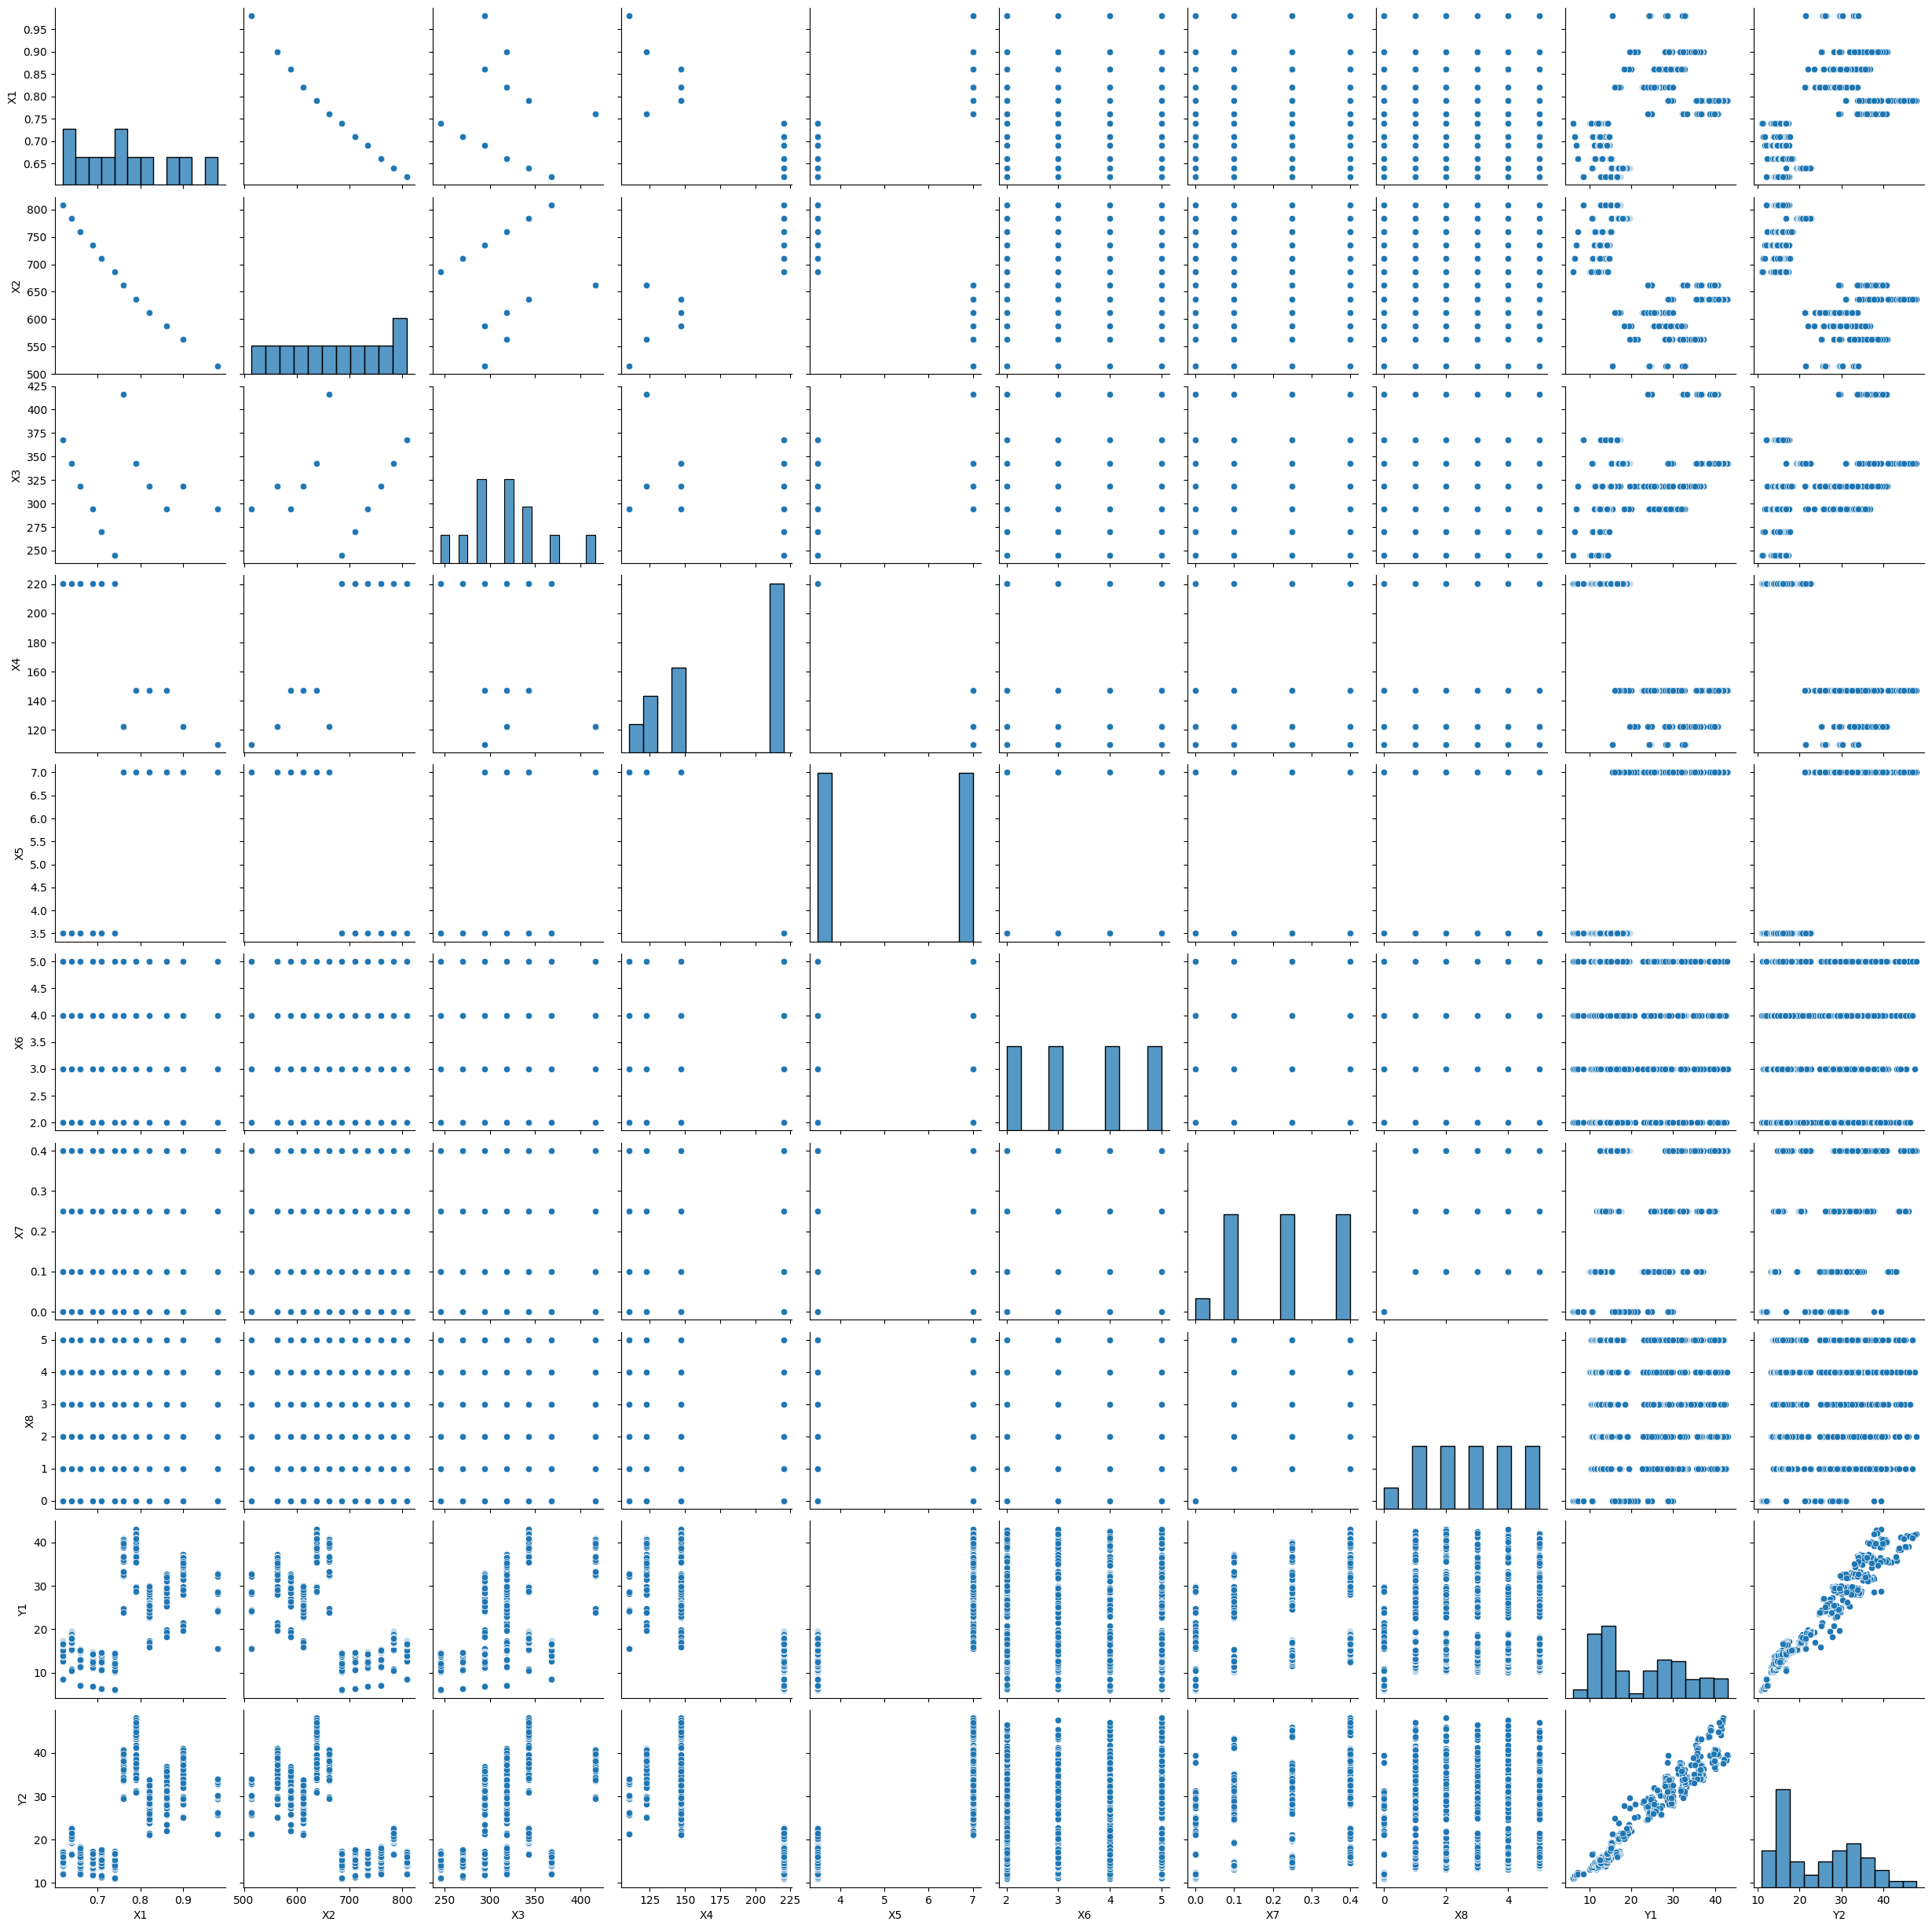

In [81]:
plt.figure(figsize=(8, 6))
sns.pairplot(df)
plt.show()

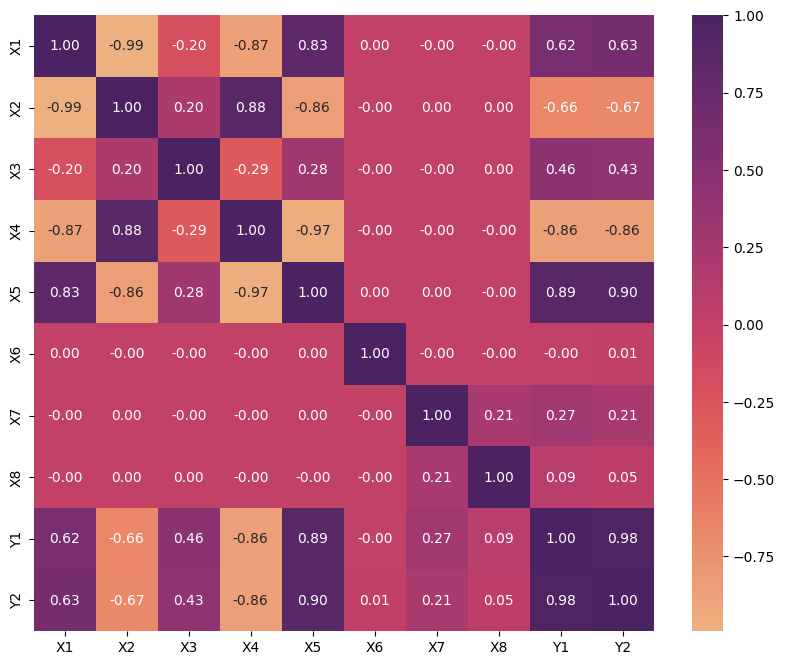

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='flare', fmt=".2f")
plt.show()

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [83]:
X_data = df_clean.drop(columns=['Heating Load', 'Cooling Load']).values
y_data = df_clean[['Heating Load', 'Cooling Load']].values.reshape(-1, 2)

### D.2 Splitting Data Test and Data Train (80:20)

In [87]:
np.random.seed(42)
indices = np.random.permutation(len(X_data))

test_size = int(len(X_data) * 0.2)

train_idx = indices[test_size:]
test_idx = indices[:test_size]

X_train, X_test = X_data[train_idx], X_data[test_idx]
y_train, y_test = y_data[train_idx], y_data[test_idx]

### D.3 Feature Scaling

#### Standard Scaler Continous Data (Non-Categorical)

Text(0.5, 1.0, 'Features Before Standard Scaling')

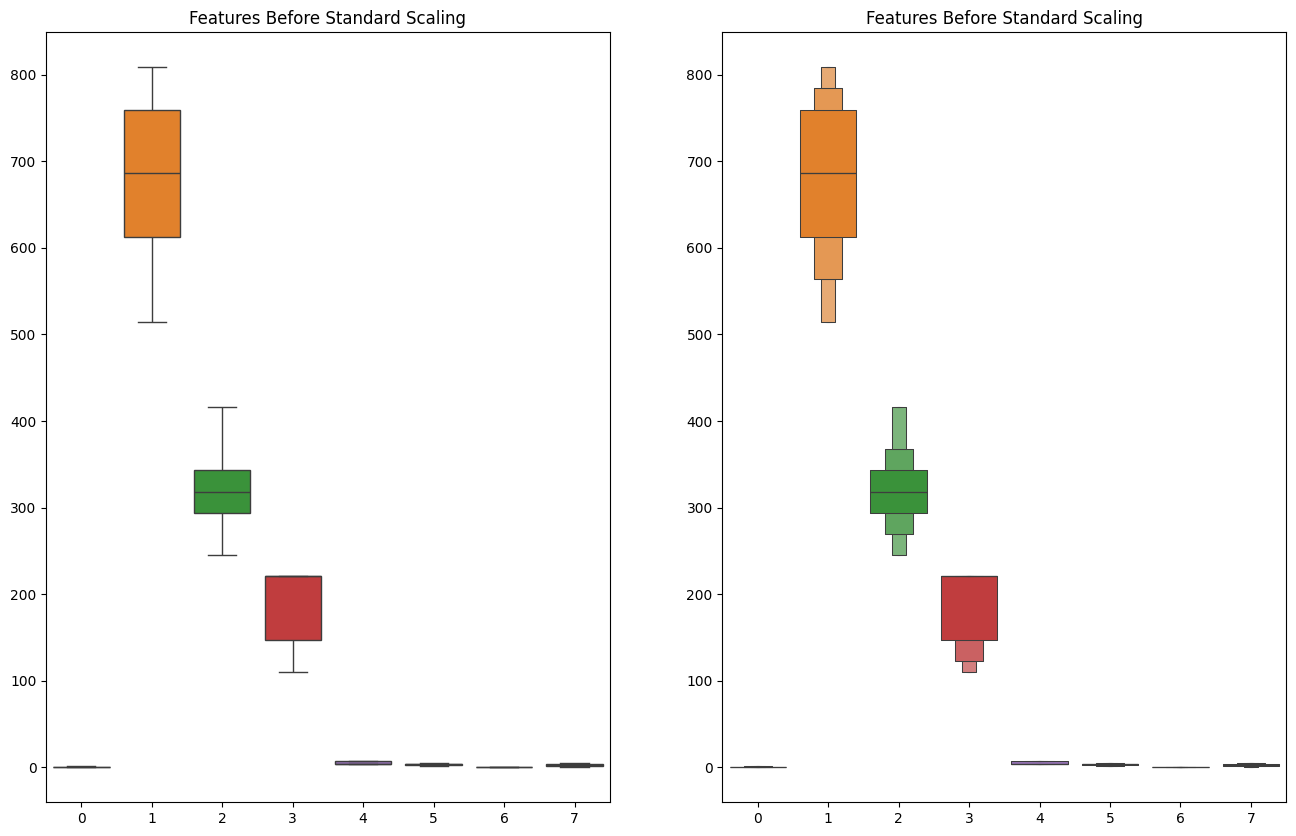

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

sns.boxplot(X_train, ax=axes[0])
axes[0].set_title("Features Before Standard Scaling")

sns.boxenplot(X_train, ax=axes[1])
axes[1].set_title("Features Before Standard Scaling")

In [91]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

Text(0.5, 1.0, 'Features After Standard Scaling')

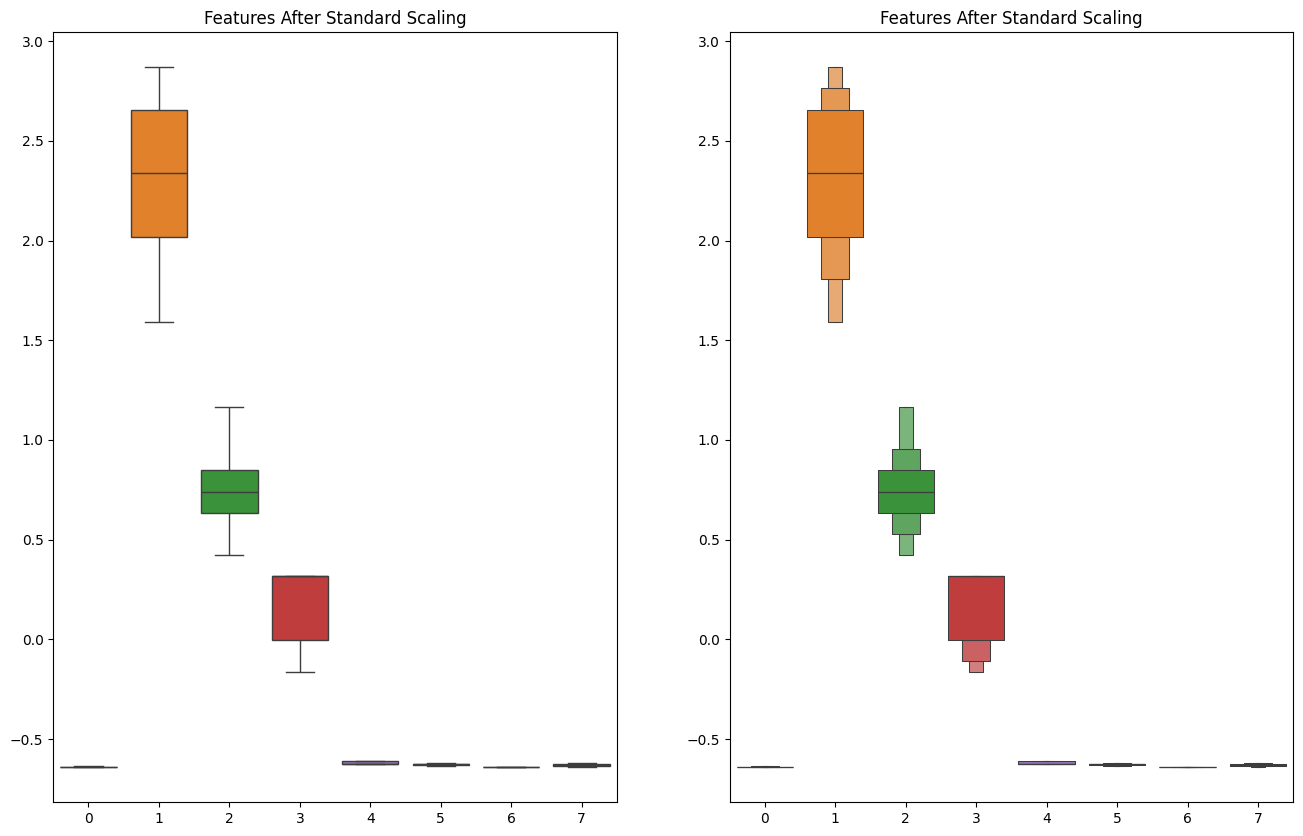

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

sns.boxplot(X_train, ax=axes[0])
axes[0].set_title("Features After Standard Scaling")

sns.boxenplot(X_train, ax=axes[1])
axes[1].set_title("Features After Standard Scaling")

### D.4 Matrix Modification (Add Bias)

In [93]:
ones_train = np.ones((len(X_train), 1))
ones_test = np.ones((len(X_test), 1))

X_train = np.concatenate((ones_train, X_train), axis=1)
X_test = np.concatenate((ones_test, X_test), axis=1)

### D.5 Calculate Theta (OLS Normal Equation)

In [94]:

theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

test_predictions = X_test @ theta
train_predictions = X_train @ theta

In [97]:
theta.shape

(9, 2)

### D.6 Modelling Results

In [98]:
df_clean.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [102]:
features = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution']

targets = ['Heating Load', 'Cooling Load']

print("----- Modelling Results -----")
for i, target_name in enumerate(targets):
    print(f"\nTarget: {target_name}")
    
    intercept = theta[0][i]
    print(f"Intercept: {intercept:.2f}")
    
    formula = f"{target_name} = {intercept:.2f}"
    
    for j, feature_name in enumerate(features):
        slope = theta[j+1][i]
        print(f"Slope (Coefisien) {feature_name}: {slope:.2f}")
        
        sign = " +" if slope > 0 else ""
        formula += f"{sign} ({slope:.2f} * {feature_name})"
    
    print(f"Formula: {formula}")

----- Modelling Results -----

Target: Heating Load
Intercept: 142573.84
Slope (Coefisien) Relative Compactness: 215246.28
Slope (Coefisien) Surface Area: -1346.80
Slope (Coefisien) Wall Area: 1619.80
Slope (Coefisien) Roof Area: 3204.95
Slope (Coefisien) Overall Height: 949.92
Slope (Coefisien) Orientation: -7.54
Slope (Coefisien) Glazing Area: 4637.98
Slope (Coefisien) Glazing Area Distribution: 48.52
Formula: Heating Load = 142573.84 + (215246.28 * Relative Compactness) (-1346.80 * Surface Area) + (1619.80 * Wall Area) + (3204.95 * Roof Area) + (949.92 * Overall Height) (-7.54 * Orientation) + (4637.98 * Glazing Area) + (48.52 * Glazing Area Distribution)

Target: Cooling Load
Intercept: 154994.85
Slope (Coefisien) Relative Compactness: 234884.87
Slope (Coefisien) Surface Area: -1899.83
Slope (Coefisien) Wall Area: 2194.33
Slope (Coefisien) Roof Area: 4359.39
Slope (Coefisien) Overall Height: 931.99
Slope (Coefisien) Orientation: 12.66
Slope (Coefisien) Glazing Area: 3404.86
Slope (

## E. Evaluation

### E.1 Calculate MSE (Mean Squared Error)

### E.2 Calculate MAE (Mean Absolute Error)

### E.3 Calculate RMSE (Root Mean Squared Error)

### E.4 Calculate R-Squared (Accuracy)

### E.5 Calculate Adjusted R-Squared (Accuracy)

### E.6 Residuals VS Predictions

### E.7 Model Evaluation (Visual)